# About Dataset

# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Exploratory Data Analysis

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (32561, 15)
___________________________
Data Types:
Types
object    9
int64     6
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
age,int64,32561,73,0,17,90
capital.gain,int64,32561,119,0,0,99999
capital.loss,int64,32561,92,0,0,4356
education,object,32561,16,0,10th,Some-college
education.num,int64,32561,16,0,1,16
fnlwgt,int64,32561,21648,0,12285,1484705
hours.per.week,int64,32561,94,0,1,99
income,object,32561,2,0,<=50K,>50K
marital.status,object,32561,7,0,Divorced,Widowed
native.country,object,32561,42,0,?,Yugoslavia


In [6]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [7]:
duplicate_values(df)

Duplicate check...
There are 24 duplicated observations in the dataset.
24 duplicates were dropped!
No more duplicate rows!


In [8]:
df.shape

(32537, 15)

In [9]:
df.describe(include = "object").T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital.status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,32537,6,Husband,13187
race,32537,5,White,27795
sex,32537,2,Male,21775
native.country,32537,42,United-States,29153
income,32537,2,<=50K,24698


## Missing Value Control

In [10]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [11]:
missing_values(df)

,Missing_Number,Missing_Percent


In [12]:
df.replace(to_replace='?',value=np.nan,inplace=True)

In [13]:
missing_values(df)

,Missing_Number,Missing_Percent
occupation,1843,0.056643
workclass,1836,0.056428
native.country,582,0.017887


In [14]:
df["workclass"].value_counts(normalize = True)

workclass
Private             0.738510
Self-emp-not-inc    0.082733
Local-gov           0.068174
State-gov           0.042279
Self-emp-inc        0.036351
Federal-gov         0.031269
Without-pay         0.000456
Never-worked        0.000228
Name: proportion, dtype: float64

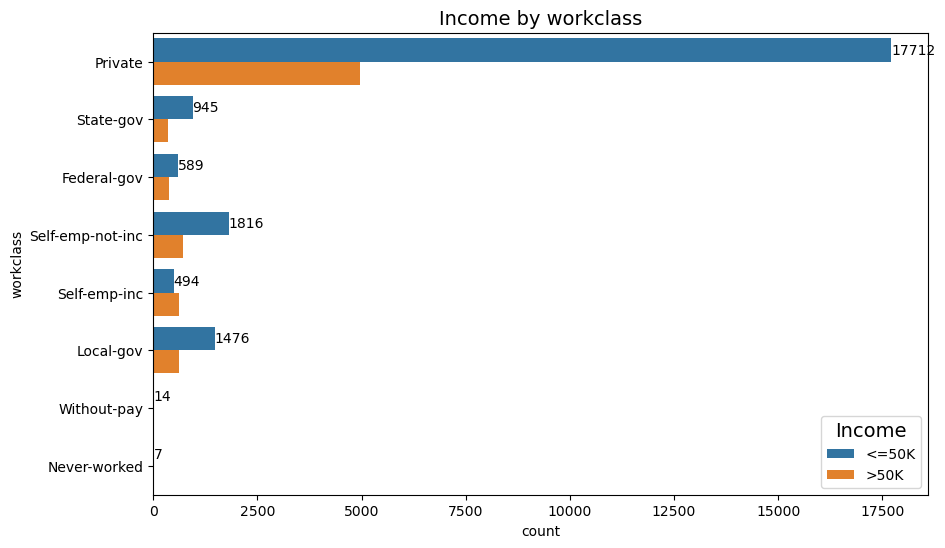

In [15]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['workclass'], hue = df['income'])
plt.title("Income by workclass", fontsize = 14)
ax.bar_label(ax.containers[0])
plt.legend(title='Income', title_fontsize='14', loc='lower right');

In [16]:
df['workclass'] = df['workclass'].fillna('Private')

In [17]:
df['occupation'].value_counts(normalize=True)

occupation
Prof-specialty       0.134749
Craft-repair         0.133381
Exec-managerial      0.132436
Adm-clerical         0.122760
Sales                0.118916
Other-service        0.107220
Machine-op-inspct    0.065159
Transport-moving     0.052030
Handlers-cleaners    0.044602
Farming-fishing      0.032319
Tech-support         0.030201
Protective-serv      0.021144
Priv-house-serv      0.004789
Armed-Forces         0.000293
Name: proportion, dtype: float64

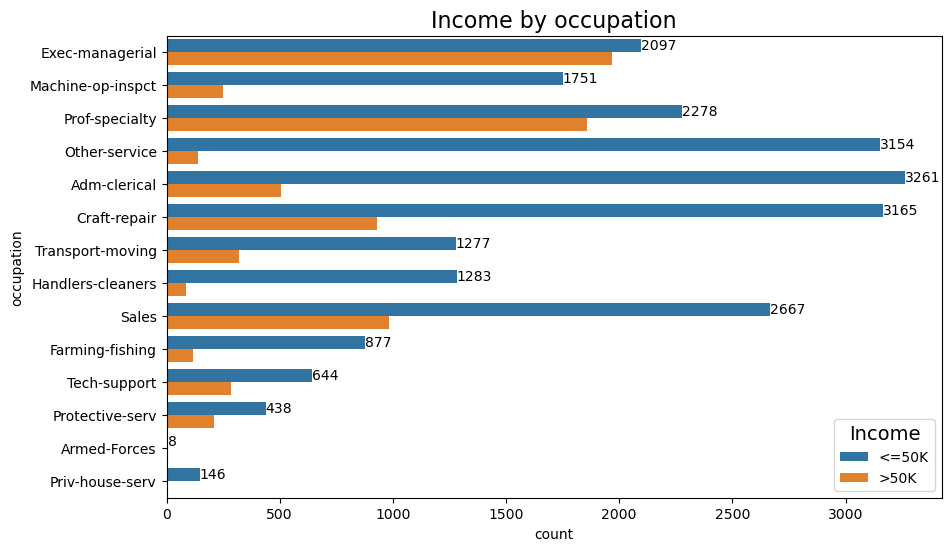

In [18]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['occupation'], hue = df['income'])
plt.title("Income by occupation", fontsize = 16)
ax.bar_label(ax.containers[0])
plt.legend(title='Income', title_fontsize='14', loc='lower right');

In [19]:
df['occupation'] = df['occupation'].fillna(method='bfill')

In [20]:
df['native.country'].value_counts(normalize=True)

native.country
United-States                 0.912314
Mexico                        0.019997
Philippines                   0.006196
Germany                       0.004287
Canada                        0.003787
Puerto-Rico                   0.003568
El-Salvador                   0.003317
India                         0.003129
Cuba                          0.002973
England                       0.002816
Jamaica                       0.002535
South                         0.002504
China                         0.002347
Italy                         0.002284
Dominican-Republic            0.002191
Vietnam                       0.002097
Guatemala                     0.001940
Japan                         0.001940
Poland                        0.001878
Columbia                      0.001846
Taiwan                        0.001596
Haiti                         0.001377
Iran                          0.001346
Portugal                      0.001158
Nicaragua                     0.001064
Peru      

In [21]:
df['native.country'] = df['native.country'].fillna('United-States')

In [22]:
missing_values(df)

,Missing_Number,Missing_Percent


## Target Variable

In [23]:
def value_cnt(df, column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)

    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='norm_counts')

    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['norm_counts']], axis=1)
    
    return df_result

In [24]:
print(df.income.value_counts())
print("---------------------")
print(df.income.value_counts(normalize=True))

income
<=50K    24698
>50K      7839
Name: count, dtype: int64
---------------------
income
<=50K    0.759074
>50K     0.240926
Name: proportion, dtype: float64


In [25]:
income_distr = df['income'].value_counts().reset_index()
income_distr.columns = ['index', 'income']  # Sütun isimlerini değiştirin
fig = px.pie(income_distr, values='income', names='index')
fig.update_layout(title="Income Distribution")
fig.show()

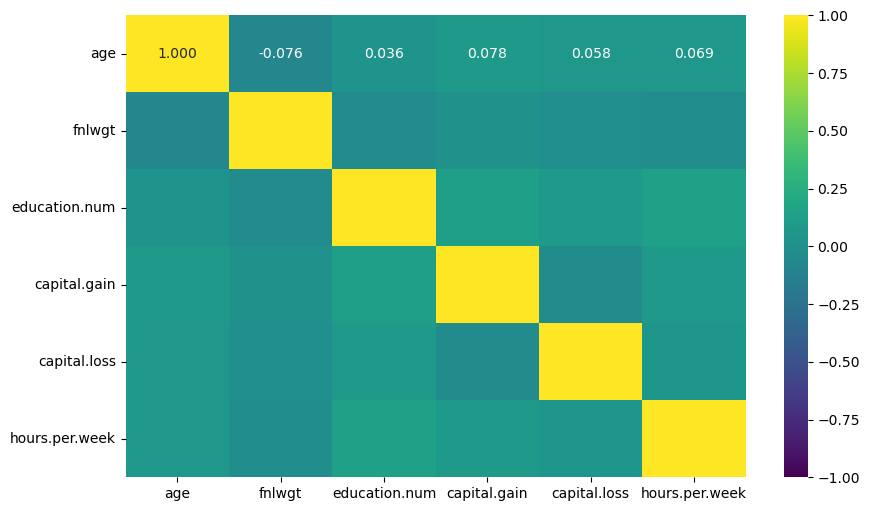

In [26]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='viridis');

In [27]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [28]:
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
17524,58,Private,126991,HS-grad,9,Divorced,Other-service,Unmarried,Black,Female,0,0,20,United-States,0
13126,35,Private,107160,12th,8,Separated,Other-service,Not-in-family,White,Female,0,0,30,United-States,0
4352,61,Self-emp-inc,66614,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
17615,40,Self-emp-inc,57233,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,1
10460,35,Private,170617,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,48,United-States,0


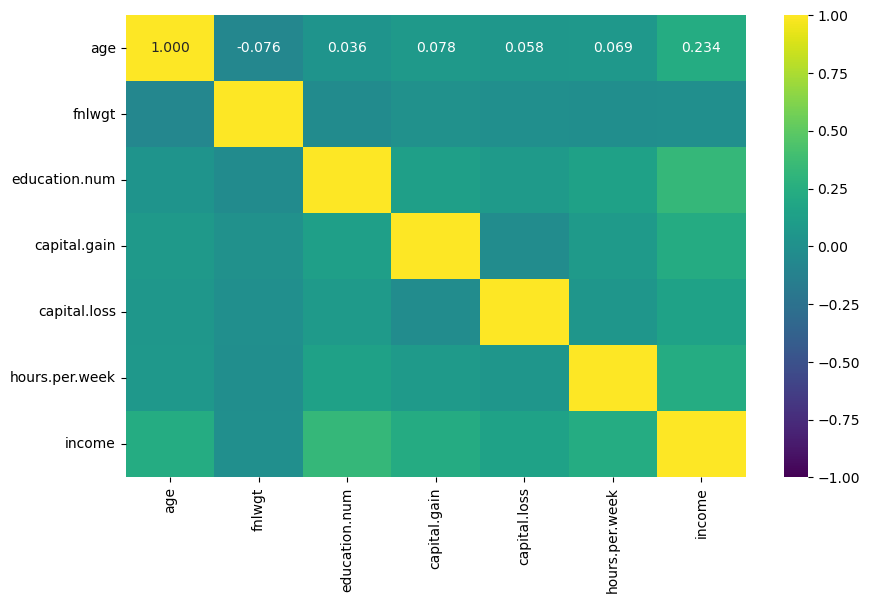

In [29]:
numeric_cols = df.select_dtypes(include=[np.number])  
sns.heatmap(numeric_cols.corr(), vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='viridis');

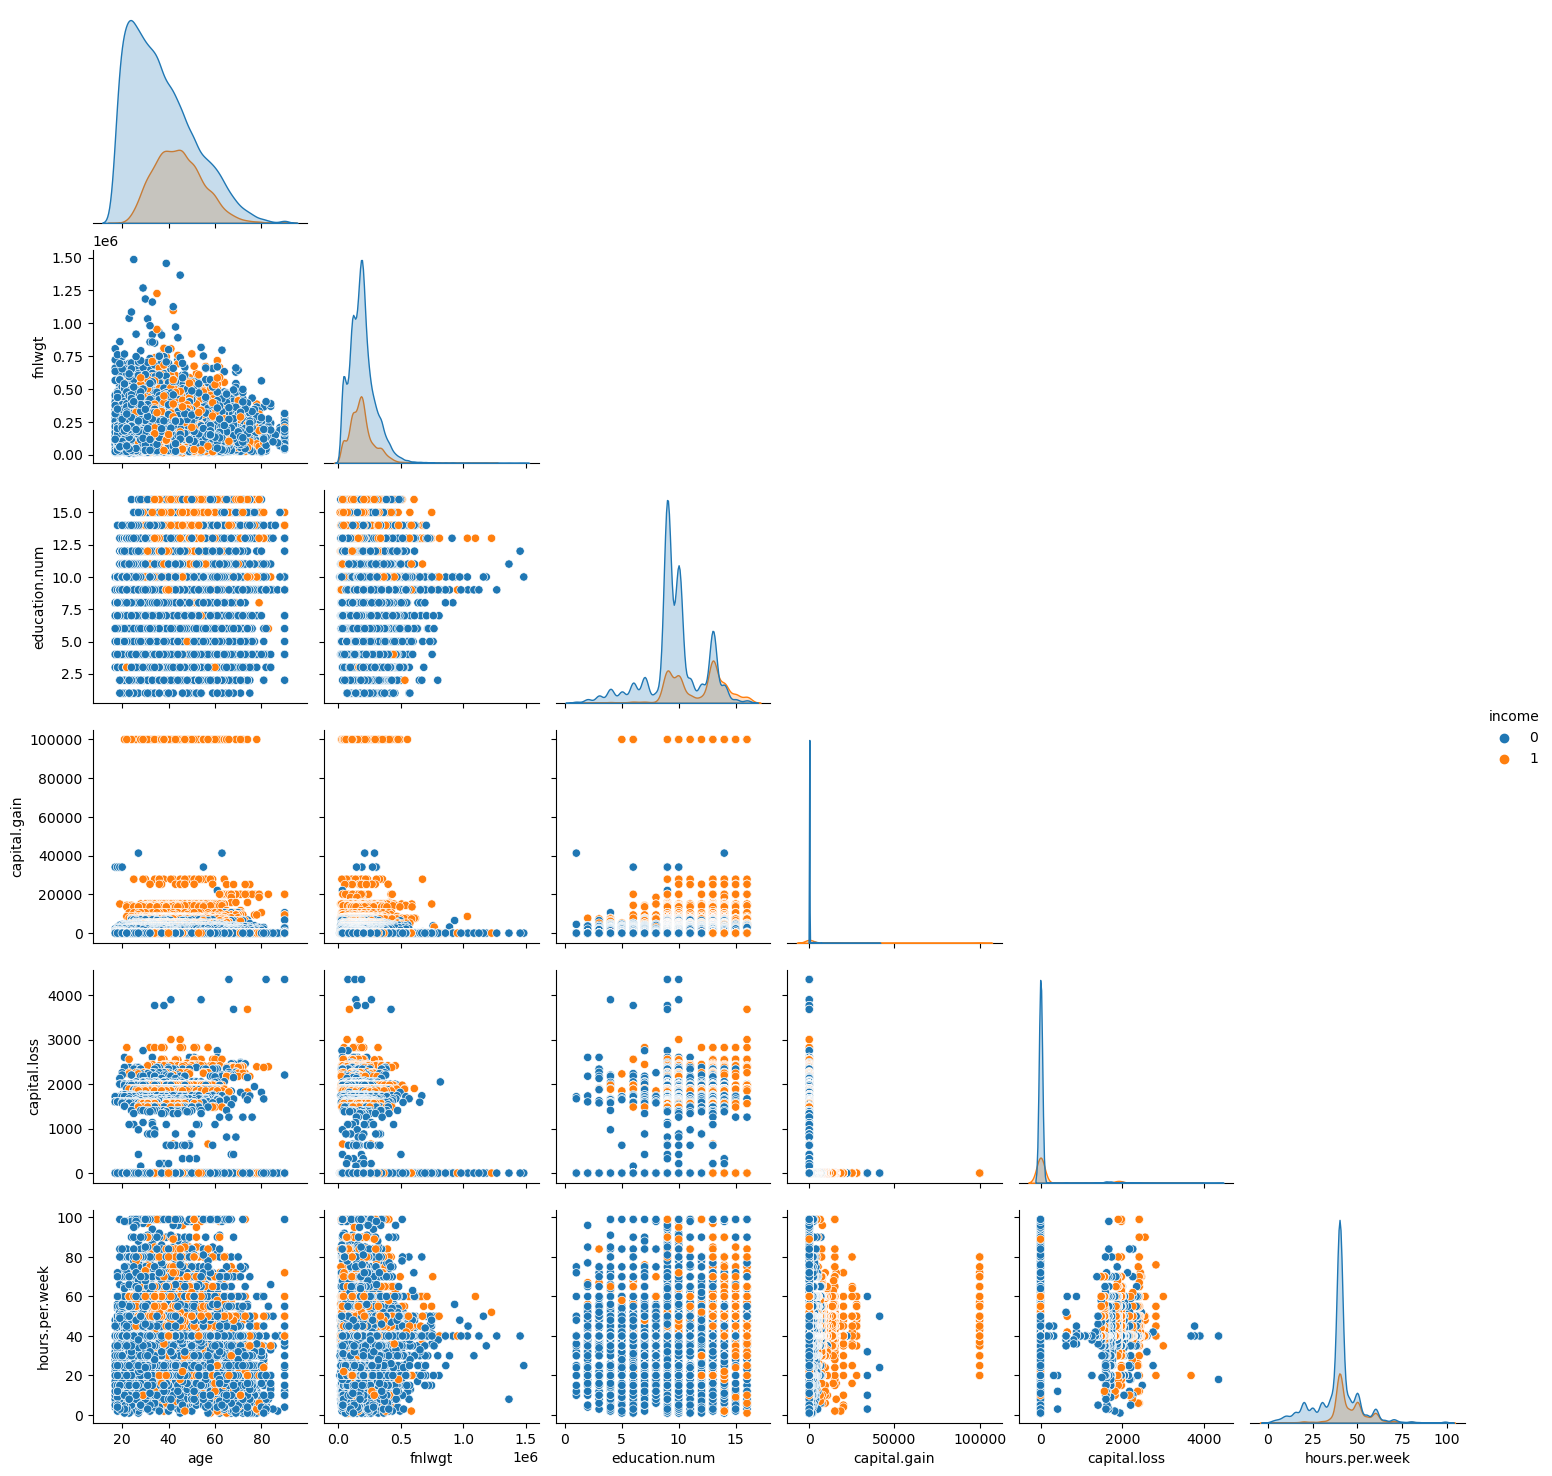

In [30]:
sns.pairplot(df, hue = "income", corner=True);

In [31]:
px.histogram(df, x='age', color="income", barmode='group', title='Income Distribution by Age')

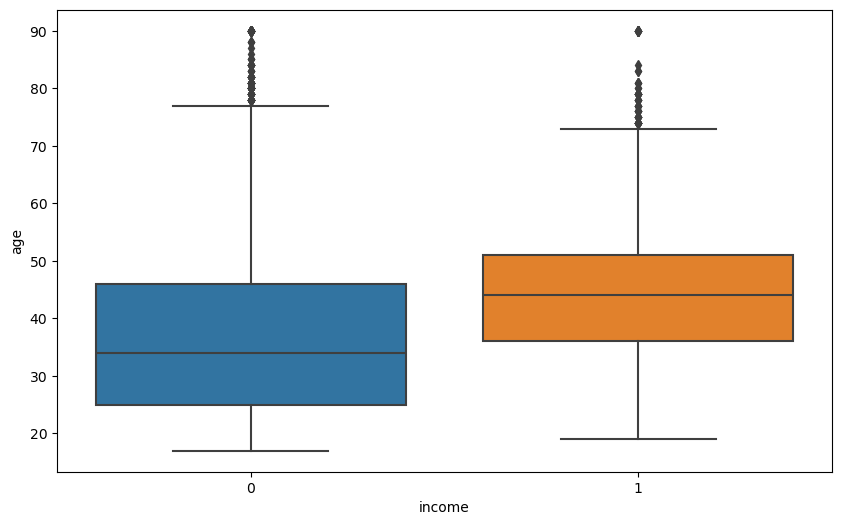

In [32]:
 sns.boxplot(data=df,y="age",x='income');

In [33]:
df['capital_diff'] = df['capital.gain'] - df['capital.loss']
df['capital_diff'] = pd.cut(df['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['capital_diff'] = df['capital_diff'].astype('object')
df.drop(['capital.gain'], axis = 1, inplace = True)
df.drop(['capital.loss'], axis = 1, inplace = True)

In [34]:
value_cnt(df, 'capital_diff')

,capital_diff,counts,norm_counts
0,Low,30889,0.94935
1,High,1648,0.05065


In [35]:
df.shape

(32537, 14)

In [36]:
len(df[(df["hours.per.week"] > 72) | (df["hours.per.week"] < 20)])

2127

In [37]:
df = df[~((df["hours.per.week"] > 72) | (df["hours.per.week"] < 20))]

In [38]:
df.shape

(30410, 14)

In [39]:
df['native.country'].loc[df['native.country'] != 'United-States'] = 'Others'

In [40]:
value_cnt(df, 'native.country')

,native.country,counts,norm_counts
0,United-States,27762,0.912923
1,Others,2648,0.087077


In [41]:
value_cnt(df, 'education')

,education,counts,norm_counts
0,HS-grad,9968,0.327787
1,Some-college,6700,0.220322
2,Bachelors,5114,0.168168
3,Masters,1637,0.053831
4,Assoc-voc,1326,0.043604
5,Assoc-acdm,1002,0.032950
6,11th,976,0.032095
7,10th,823,0.027063
8,7th-8th,580,0.019073
9,Prof-school,527,0.017330


In [42]:
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', '12th'], 'School', inplace = True)

In [43]:
df1 = df.copy()

In [44]:
df.to_excel('son.xlsx', index=False)

In [45]:
df = pd.read_excel('son.xlsx')

# Data Pre-Processing

## Train | Test Split

In [46]:
X= df.drop(columns="income")
y= df.income

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [48]:
cat_onehot = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'marital.status']
cat_ordinal = ['education', 'capital_diff']
    
cat_for_edu = ['Preschool', 'School', 'HS-grad','Some-college', 'Assoc-voc', 'Assoc-acdm','Bachelors', 'Masters', 'Prof-school', 'Doctorate']
cat_for_capdiff = ['Low', 'High']

In [49]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories= [cat_for_edu, cat_for_capdiff]), cat_ordinal),
                                       remainder='passthrough')

In [50]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,capital_diff
6967,61,Private,232308,School,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,Low
1836,40,Self-emp-inc,182437,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,50,United-States,High
10104,22,Private,227626,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,40,United-States,Low
22388,34,Private,261799,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Husband,Black,Male,45,United-States,Low
21041,20,Private,224640,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,40,United-States,Low


In [51]:
X_test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,capital_diff
14302,48,Private,76017,HS-grad,9,Widowed,Other-service,Unmarried,White,Female,25,United-States,Low
28921,31,Local-gov,224234,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,40,United-States,Low
17335,35,Private,217893,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,30,United-States,Low
7358,43,Private,188786,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,45,United-States,Low
25137,33,Private,348592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,40,United-States,Low


In [52]:
X_train.shape, X_test.shape

((24328, 13), (6082, 13))

In [53]:
column_trans.fit_transform(X_train)

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.32308e+05,
        6.00000e+00, 4.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.82437e+05,
        1.20000e+01, 5.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.27626e+05,
        9.00000e+00, 4.00000e+01],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.98632e+05,
        1.00000e+01, 5.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.84756e+05,
        1.00000e+01, 3.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.57289e+05,
        7.00000e+00, 4.00000e+01]])

In [54]:
X_train_trans = column_trans.fit_transform(X_train) 
X_test_trans = column_trans.transform(X_test)

In [55]:
X_train_trans.shape, X_test_trans.shape

((24328, 50), (6082, 50))

In [56]:
X_train_trans

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.32308e+05,
        6.00000e+00, 4.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.82437e+05,
        1.20000e+01, 5.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.27626e+05,
        9.00000e+00, 4.00000e+01],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.98632e+05,
        1.00000e+01, 5.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.84756e+05,
        1.00000e+01, 3.00000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.57289e+05,
        7.00000e+00, 4.00000e+01]])

In [57]:
column_trans.get_feature_names_out()

array(['onehotencoder__workclass_Federal-gov',
       'onehotencoder__workclass_Local-gov',
       'onehotencoder__workclass_Never-worked',
       'onehotencoder__workclass_Private',
       'onehotencoder__workclass_Self-emp-inc',
       'onehotencoder__workclass_Self-emp-not-inc',
       'onehotencoder__workclass_State-gov',
       'onehotencoder__workclass_Without-pay',
       'onehotencoder__occupation_Adm-clerical',
       'onehotencoder__occupation_Armed-Forces',
       'onehotencoder__occupation_Craft-repair',
       'onehotencoder__occupation_Exec-managerial',
       'onehotencoder__occupation_Farming-fishing',
       'onehotencoder__occupation_Handlers-cleaners',
       'onehotencoder__occupation_Machine-op-inspct',
       'onehotencoder__occupation_Other-service',
       'onehotencoder__occupation_Priv-house-serv',
       'onehotencoder__occupation_Prof-specialty',
       'onehotencoder__occupation_Protective-serv',
       'onehotencoder__occupation_Sales',
       'onehotencod

In [58]:
features = column_trans.get_feature_names_out()

In [59]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

,onehotencoder__workclass_Federal-gov,onehotencoder__workclass_Local-gov,onehotencoder__workclass_Never-worked,onehotencoder__workclass_Private,onehotencoder__workclass_Self-emp-inc,onehotencoder__workclass_Self-emp-not-inc,onehotencoder__workclass_State-gov,onehotencoder__workclass_Without-pay,onehotencoder__occupation_Adm-clerical,onehotencoder__occupation_Armed-Forces,...,onehotencoder__marital.status_Married-spouse-absent,onehotencoder__marital.status_Never-married,onehotencoder__marital.status_Separated,onehotencoder__marital.status_Widowed,ordinalencoder__education,ordinalencoder__capital_diff,remainder__age,remainder__fnlwgt,remainder__education.num,remainder__hours.per.week
6967,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,61.0,232308.0,6.0,40.0
1836,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,1.0,40.0,182437.0,12.0,50.0
10104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,22.0,227626.0,9.0,40.0
22388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,34.0,261799.0,11.0,45.0
21041,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,3.0,0.0,20.0,224640.0,10.0,40.0


In [60]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

,onehotencoder__workclass_Federal-gov,onehotencoder__workclass_Local-gov,onehotencoder__workclass_Never-worked,onehotencoder__workclass_Private,onehotencoder__workclass_Self-emp-inc,onehotencoder__workclass_Self-emp-not-inc,onehotencoder__workclass_State-gov,onehotencoder__workclass_Without-pay,onehotencoder__occupation_Adm-clerical,onehotencoder__occupation_Armed-Forces,...,onehotencoder__marital.status_Married-spouse-absent,onehotencoder__marital.status_Never-married,onehotencoder__marital.status_Separated,onehotencoder__marital.status_Widowed,ordinalencoder__education,ordinalencoder__capital_diff,remainder__age,remainder__fnlwgt,remainder__education.num,remainder__hours.per.week
14302,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,48.0,76017.0,9.0,25.0
28921,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,31.0,224234.0,9.0,40.0
17335,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,35.0,217893.0,9.0,30.0
7358,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,43.0,188786.0,10.0,45.0
25137,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,33.0,348592.0,9.0,40.0


In [61]:
corr_by_income = X_train.join(y_train).corr()["income"].sort_values()[:-1]
corr_by_income

onehotencoder__marital.status_Never-married           -0.314213
onehotencoder__relationship_Own-child                 -0.221005
onehotencoder__sex_Female                             -0.210939
onehotencoder__relationship_Not-in-family             -0.193319
onehotencoder__occupation_Other-service               -0.158200
onehotencoder__relationship_Unmarried                 -0.147372
onehotencoder__marital.status_Divorced                -0.132096
onehotencoder__workclass_Private                      -0.127657
onehotencoder__occupation_Adm-clerical                -0.097735
onehotencoder__occupation_Handlers-cleaners           -0.091929
onehotencoder__race_Black                             -0.090854
onehotencoder__relationship_Other-relative            -0.083928
onehotencoder__occupation_Machine-op-inspct           -0.079637
onehotencoder__marital.status_Separated               -0.076641
onehotencoder__marital.status_Widowed                 -0.060090
onehotencoder__occupation_Farming-fishin

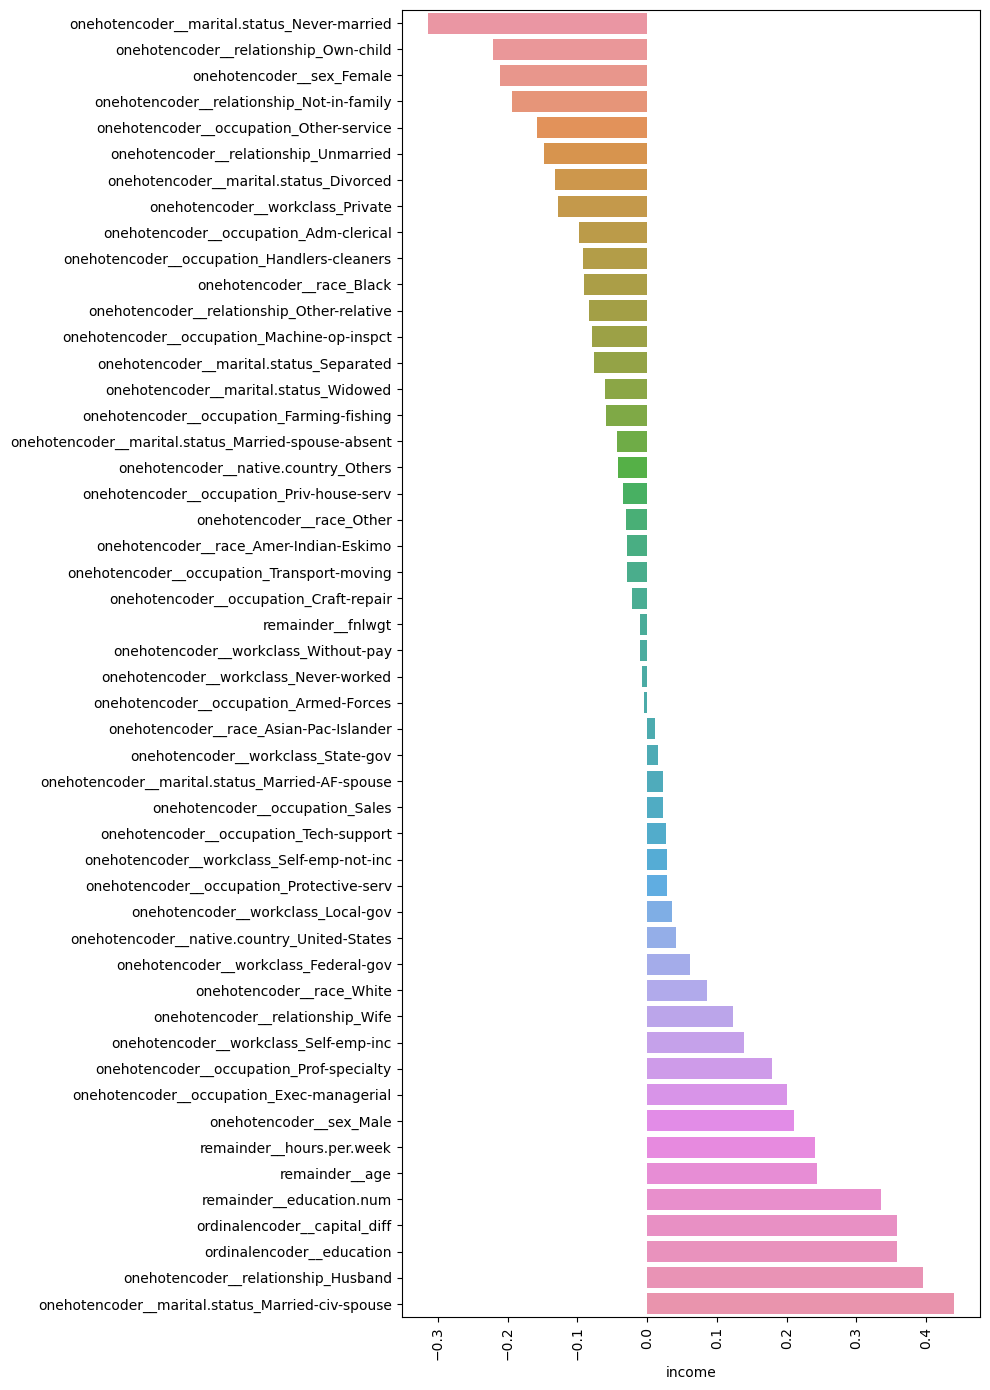

In [62]:
plt.figure(figsize = (10,14))
sns.barplot(y = corr_by_income.index, x = corr_by_income)
plt.xticks(rotation=90)
plt.tight_layout();

# Implement Logistic Regression

In [63]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

log_pipe = Pipeline(steps=operations)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [64]:
y_pred = log_pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

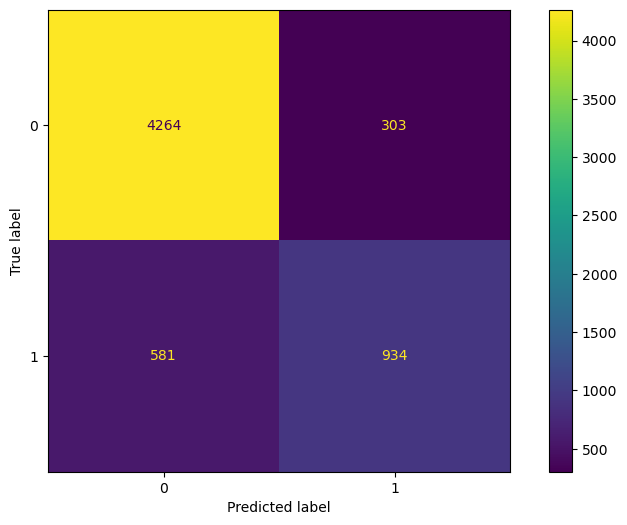

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_pipe, X_test, y_test)

In [66]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [67]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 

Test_Set
[[4264  303]
 [ 581  934]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4567
           1       0.76      0.62      0.68      1515

    accuracy                           0.85      6082
   macro avg       0.82      0.78      0.79      6082
weighted avg       0.85      0.85      0.85      6082


Train_Set
[[16966  1300]
 [ 2474  3588]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     18266
           1       0.73      0.59      0.66      6062

    accuracy                           0.84     24328
   macro avg       0.80      0.76      0.78     24328
weighted avg       0.84      0.84      0.84     24328



## GridSearch CV

In [68]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

log_pipe = Pipeline(steps=operations)

C = [0.01, 0.1, 1] 
class_weight= ["balanced", None]

param_grid = [
    {
        "logistic__penalty" : ['l2', 'none'],
        "logistic__C" : C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['sag', 'lbfgs']
    },
    {
        "logistic__penalty" : ['l1', 'l2'],
        "logistic__C" : C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['liblinear', 'saga']
    }
]

cv = StratifiedKFold(n_splits = 10)

grid_model = GridSearchCV(estimator=log_pipe,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",
                          n_jobs = -1,
                          return_train_score=True)

In [69]:
log_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [70]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logistic__C': [0.01, 0.1, 1],
                          'logistic__class_weight': ['balanced', None],
                          'logistic__penalty': ['l2', 'none'],
                          'logistic__solver': ['sag', 'lbfgs']},
                         {'logistic__C': [0.01, 0.1, 1],
                          'logistic__class_weight': ['balanced', None],
                          'logistic__penalty': ['l1', 'l2'],
                          'logistic__solver': ['liblinear', 'saga']}],
             return_train_score=True, scoring='recall')

In [71]:
grid_model.best_params_

{'logistic__C': 0.01,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [72]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [73]:
grid_model.best_score_

0.8479037195317554

In [74]:
grid_model.best_index_

24

In [75]:
pd.DataFrame(grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.839658
mean_train_score    0.842351
Name: 1, dtype: object

In [76]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  


Test_Set
[[3632  935]
 [ 236 1279]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4567
           1       0.58      0.84      0.69      1515

    accuracy                           0.81      6082
   macro avg       0.76      0.82      0.77      6082
weighted avg       0.85      0.81      0.82      6082


Train_Set
[[14437  3829]
 [  911  5151]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     18266
           1       0.57      0.85      0.68      6062

    accuracy                           0.81     24328
   macro avg       0.76      0.82      0.77     24328
weighted avg       0.85      0.81      0.82     24328



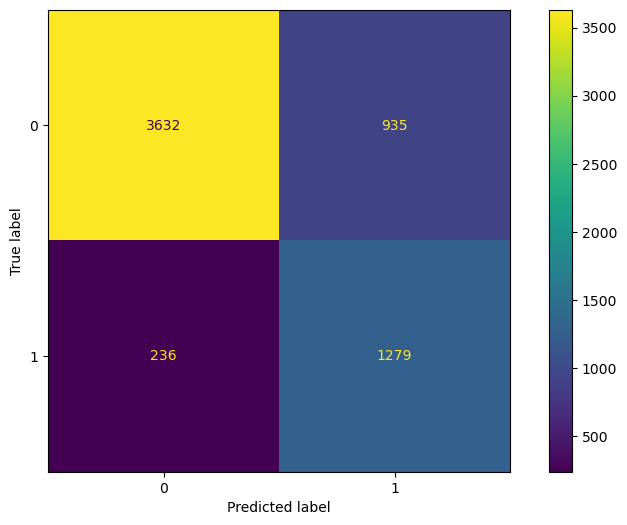

In [77]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

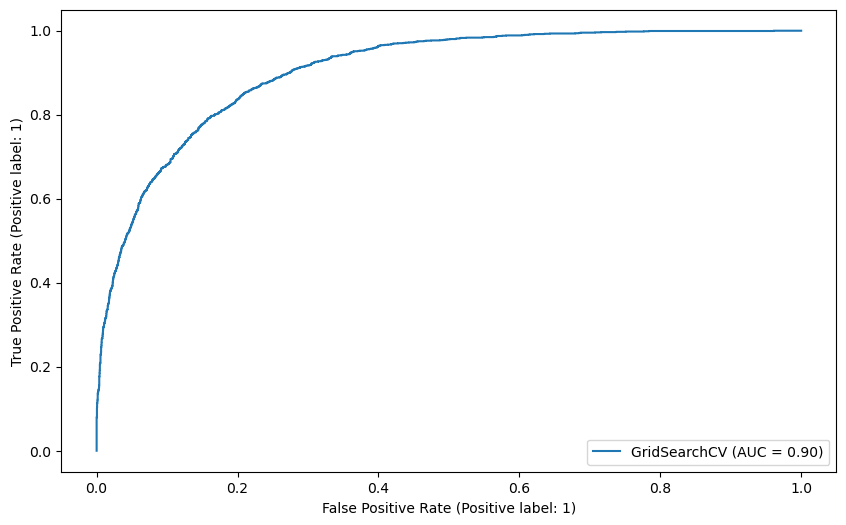

In [78]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

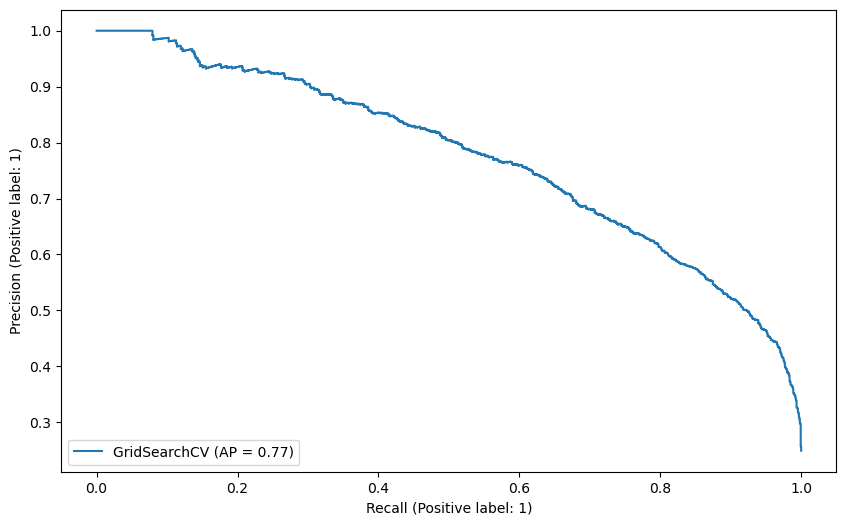

In [79]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

# Implement K Nearest Neigbors (KNN)

In [80]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

knn_pipe = Pipeline(steps=operations)

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [81]:
y_pred = knn_pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [82]:
y_pred_proba = knn_pipe.predict_proba(X_test)

In [83]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.0,0.0
1,0.8,0.2
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
6077,1.0,0.0
6078,1.0,0.0
6079,1.0,0.0
6080,0.2,0.8


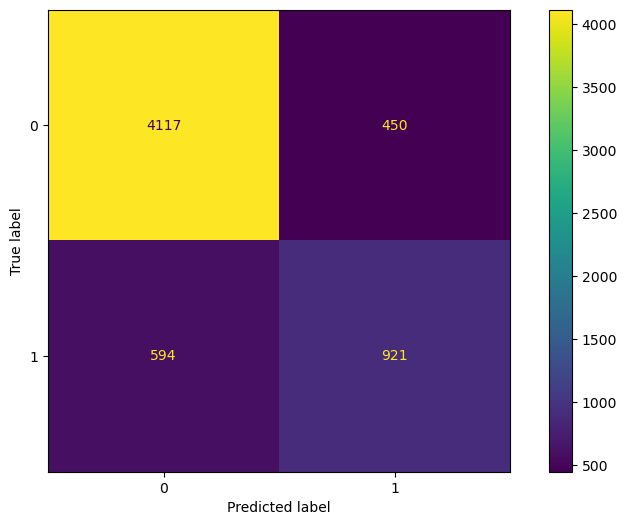

In [84]:
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test)

In [85]:
eval_metric(knn_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[4117  450]
 [ 594  921]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4567
           1       0.67      0.61      0.64      1515

    accuracy                           0.83      6082
   macro avg       0.77      0.75      0.76      6082
weighted avg       0.82      0.83      0.83      6082


Train_Set
[[17108  1158]
 [ 1792  4270]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     18266
           1       0.79      0.70      0.74      6062

    accuracy                           0.88     24328
   macro avg       0.85      0.82      0.83     24328
weighted avg       0.88      0.88      0.88     24328



## Elbow Method for Choosing Reasonable K Values

In [86]:
test_error_rates = []


for k in range(1,10):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['recall'], cv = 5)
    
    recall_mean = scores["test_recall"].mean() 
    
    test_error = 1 - recall_mean
    
    test_error_rates.append(test_error)

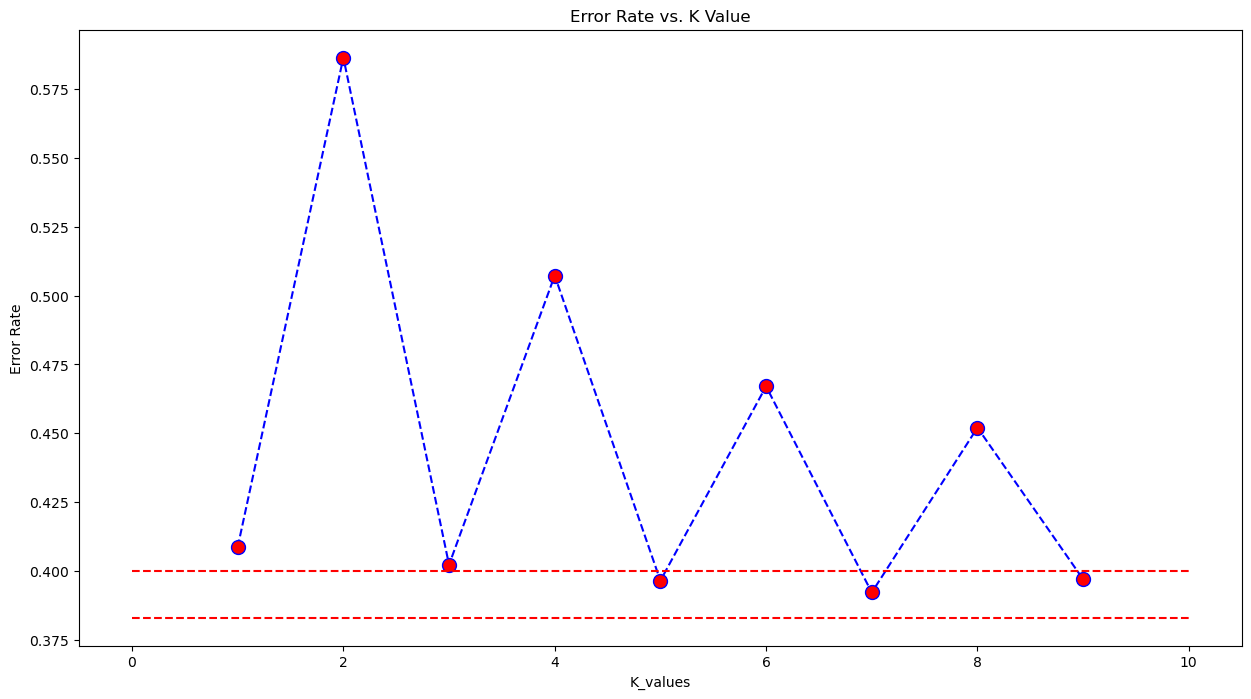

In [87]:
plt.figure(figsize=(15,8))
plt.plot(range(1,10), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.4, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.383, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

## Overfiting and underfiting control for k values

In [88]:
test_error_rates = []
train_error_rates = []

for k in range(1,10):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['recall'], cv = 5, return_train_score=True)
    
    recall_test_mean = scores["test_recall"].mean() 
    recall_train_mean = scores["train_recall"].mean() 

    
    test_error = 1 - recall_test_mean
    train_error = 1 - recall_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

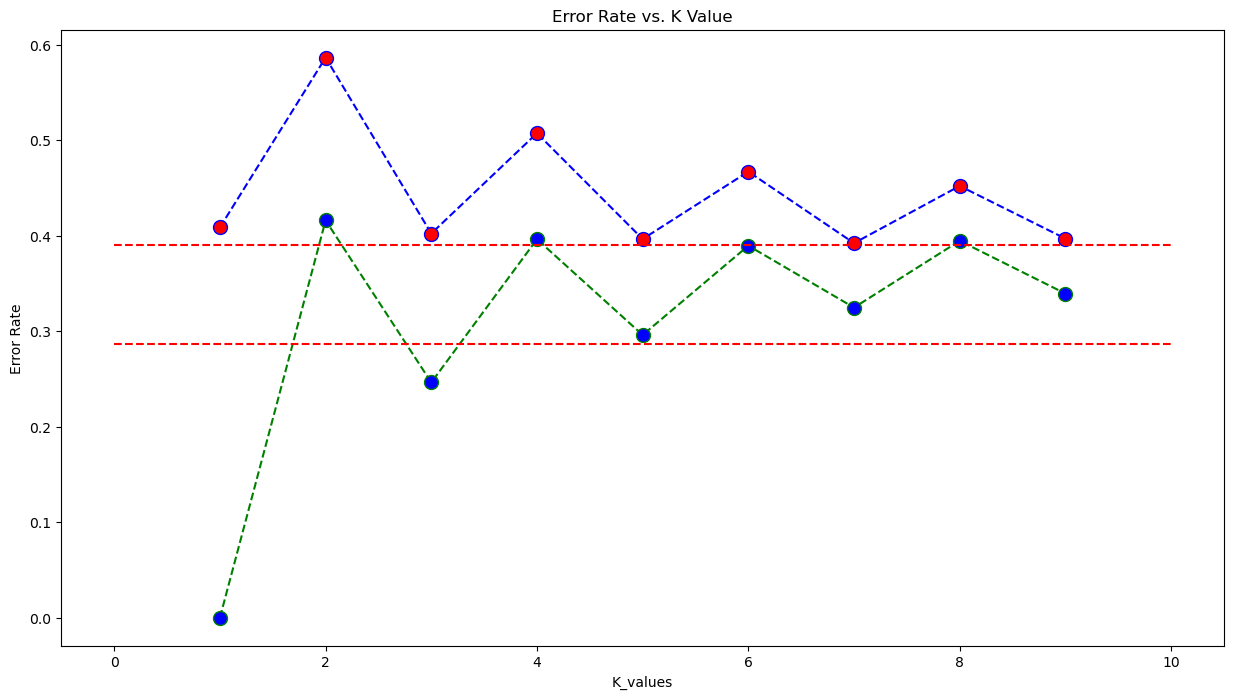

In [89]:
plt.figure(figsize=(15,8))
plt.plot(range(1,10), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,10), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.39, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.286, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

## Scores by Various K Values

In [90]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=3))]
knn3 = Pipeline(steps=operations)

knn3.fit(X_train, y_train)
print('WITH K=3\n')
eval_metric(knn3, X_train, y_train, X_test, y_test)

WITH K=3

Test_Set
[[4072  495]
 [ 602  913]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4567
           1       0.65      0.60      0.62      1515

    accuracy                           0.82      6082
   macro avg       0.76      0.75      0.75      6082
weighted avg       0.82      0.82      0.82      6082


Train_Set
[[17232  1034]
 [ 1476  4586]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     18266
           1       0.82      0.76      0.79      6062

    accuracy                           0.90     24328
   macro avg       0.87      0.85      0.86     24328
weighted avg       0.89      0.90      0.90     24328



In [91]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
knn5 = Pipeline(steps=operations)

knn5.fit(X_train, y_train)
print('WITH K=5\n')
eval_metric(knn5, X_train, y_train, X_test, y_test)

WITH K=5

Test_Set
[[4117  450]
 [ 594  921]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4567
           1       0.67      0.61      0.64      1515

    accuracy                           0.83      6082
   macro avg       0.77      0.75      0.76      6082
weighted avg       0.82      0.83      0.83      6082


Train_Set
[[17108  1158]
 [ 1792  4270]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     18266
           1       0.79      0.70      0.74      6062

    accuracy                           0.88     24328
   macro avg       0.85      0.82      0.83     24328
weighted avg       0.88      0.88      0.88     24328



In [92]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))]
knn7 = Pipeline(steps=operations)

knn7.fit(X_train, y_train)
print('WITH K=7\n')
eval_metric(knn7, X_train, y_train, X_test, y_test)

WITH K=7

Test_Set
[[4153  414]
 [ 582  933]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4567
           1       0.69      0.62      0.65      1515

    accuracy                           0.84      6082
   macro avg       0.78      0.76      0.77      6082
weighted avg       0.83      0.84      0.83      6082


Train_Set
[[17057  1209]
 [ 1939  4123]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     18266
           1       0.77      0.68      0.72      6062

    accuracy                           0.87     24328
   macro avg       0.84      0.81      0.82     24328
weighted avg       0.87      0.87      0.87     24328



## Cross Validate For Optimal K Value

In [93]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.029009,0.204080,0.815454,0.871569,0.647280,0.775992,0.569307,0.681268,0.605795,0.725551
2,0.021502,0.180091,0.841348,0.868372,0.701465,0.768461,0.632013,0.675220,0.664931,0.718829
3,0.021529,0.181680,0.823263,0.871934,0.662362,0.776135,0.592409,0.683101,0.625436,0.726652
4,0.021558,0.179749,0.849568,0.869422,0.728137,0.772737,0.632013,0.674304,0.676678,0.720172
5,0.021859,0.179100,0.837649,0.870244,0.697196,0.771773,0.615512,0.680535,0.653812,0.723288
6,0.021252,0.187371,0.838471,0.868600,0.693285,0.768366,0.630363,0.676686,0.660328,0.719618
7,0.023031,0.181310,0.831895,0.869559,0.698000,0.770110,0.574959,0.679193,0.630533,0.721800
8,0.022995,0.204018,0.839293,0.868189,0.693548,0.768668,0.637562,0.673694,0.664378,0.718054
9,0.022542,0.199178,0.824424,0.870296,0.677932,0.771820,0.562706,0.680718,0.614968,0.723413
10,0.022542,0.192692,0.837582,0.869109,0.696462,0.770017,0.617162,0.676870,0.654418,0.720445


In [94]:
df_scores.mean()[2:]

test_accuracy      0.833895
train_accuracy     0.869729
test_precision     0.689567
train_precision    0.771408
test_recall        0.606401
train_recall       0.678159
test_f1            0.645128
train_f1           0.721782
dtype: float64

## Gridsearch Method for Choosing Reasonable K Values

In [95]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

In [96]:
knn_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [97]:
k_values = range(1,10)

In [98]:
param_grid = {"knn__n_neighbors":k_values, "knn__p": [1,2], "knn__weights": ['uniform', "distance"]}

knn_grid_model = GridSearchCV(knn_model, param_grid, cv=5, scoring = "recall", return_train_score=True, n_jobs=-1)

knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 10), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='recall')

In [99]:
knn_grid_model.best_params_

{'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'uniform'}

In [100]:
knn_grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [101]:
knn_grid_model.best_index_

26

In [102]:
pd.DataFrame(knn_grid_model.cv_results_).loc[32, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.590231
mean_train_score    0.650116
Name: 32, dtype: object

In [103]:
knn_grid_model.best_score_

0.6078810684036252

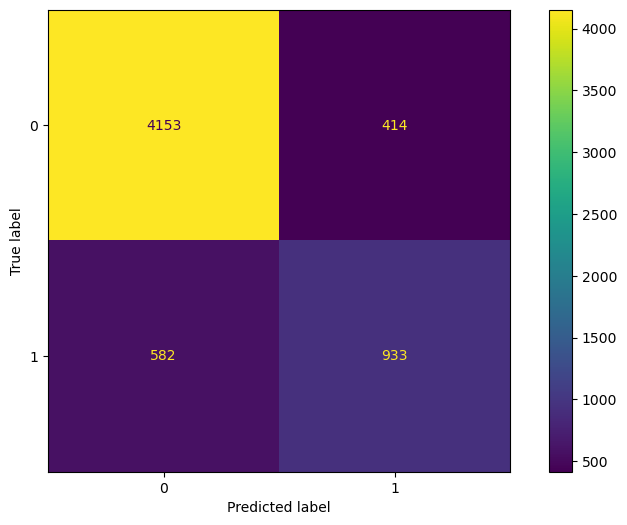

In [104]:
ConfusionMatrixDisplay.from_estimator(knn_grid_model, X_test, y_test)

In [105]:
print('WITH K=7\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

WITH K=7

Test_Set
[[4153  414]
 [ 582  933]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4567
           1       0.69      0.62      0.65      1515

    accuracy                           0.84      6082
   macro avg       0.78      0.76      0.77      6082
weighted avg       0.83      0.84      0.83      6082


Train_Set
[[17057  1209]
 [ 1939  4123]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     18266
           1       0.77      0.68      0.72      6062

    accuracy                           0.87     24328
   macro avg       0.84      0.81      0.82     24328
weighted avg       0.87      0.87      0.87     24328



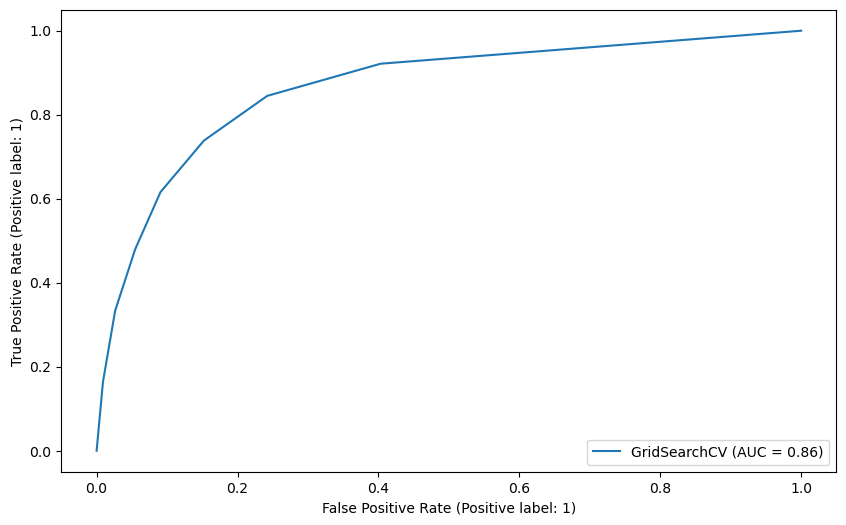

In [106]:
RocCurveDisplay.from_estimator(knn_grid_model, X_test, y_test)

In [107]:
y_pred_proba = knn_grid_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8647598173436788

In [108]:
y_pred_proba = knn_grid_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8647598173436788

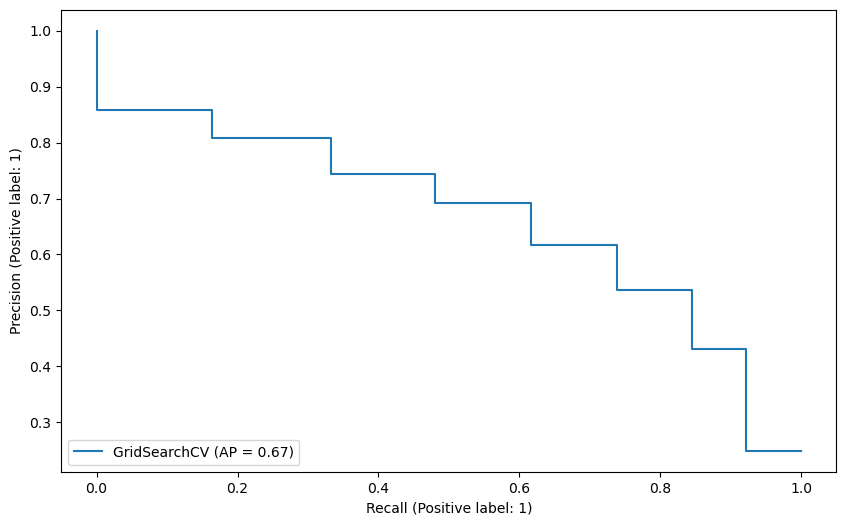

In [109]:
PrecisionRecallDisplay.from_estimator(knn_grid_model, X_test, y_test)

# Implement SVM (Support Vector Machine)

In [110]:
operations = [("scaler", StandardScaler()), ("svm", SVC())]

svm_pipe = Pipeline(steps=operations)

svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [111]:
eval_metric(svm_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[4263  304]
 [ 608  907]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4567
           1       0.75      0.60      0.67      1515

    accuracy                           0.85      6082
   macro avg       0.81      0.77      0.78      6082
weighted avg       0.84      0.85      0.84      6082


Train_Set
[[17185  1081]
 [ 2448  3614]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     18266
           1       0.77      0.60      0.67      6062

    accuracy                           0.85     24328
   macro avg       0.82      0.77      0.79     24328
weighted avg       0.85      0.85      0.85     24328



In [112]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]
svm_pipe = Pipeline(steps=operations)

scores = cross_validate(svm_pipe, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.845240
test_precision    0.744415
test_recall       0.577038
test_f1           0.650109
dtype: float64

## SVC GridsearchCV

In [113]:
svm_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [114]:
param_grid = {"SVC__C":[0.01, 1],
             "SVC__gamma":[0.1, 0.3],
             "SVC__kernel":["rbf", "linear"]}

operations = [("scaler", StandardScaler()), ("SVC", SVC(class_weight="balanced"))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring='recall_macro', cv=5)

In [115]:
svm_model_grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(class_weight='balanced'))]),
             param_grid={'SVC__C': [0.01, 1], 'SVC__gamma': [0.1, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='recall_macro')>

In [116]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(class_weight='balanced'))]),
             param_grid={'SVC__C': [0.01, 1], 'SVC__gamma': [0.1, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='recall_macro')

In [117]:
svm_model_grid.best_score_

0.7974298342528249

In [118]:
svm_model_grid.best_params_

{'SVC__C': 0.01, 'SVC__gamma': 0.1, 'SVC__kernel': 'linear'}

In [119]:
svm_model_grid.best_index_

1

In [120]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[3519 1048]
 [ 259 1256]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      4567
           1       0.55      0.83      0.66      1515

    accuracy                           0.79      6082
   macro avg       0.74      0.80      0.75      6082
weighted avg       0.84      0.79      0.80      6082


Train_Set
[[13980  4286]
 [ 1015  5047]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     18266
           1       0.54      0.83      0.66      6062

    accuracy                           0.78     24328
   macro avg       0.74      0.80      0.75     24328
weighted avg       0.83      0.78      0.79     24328



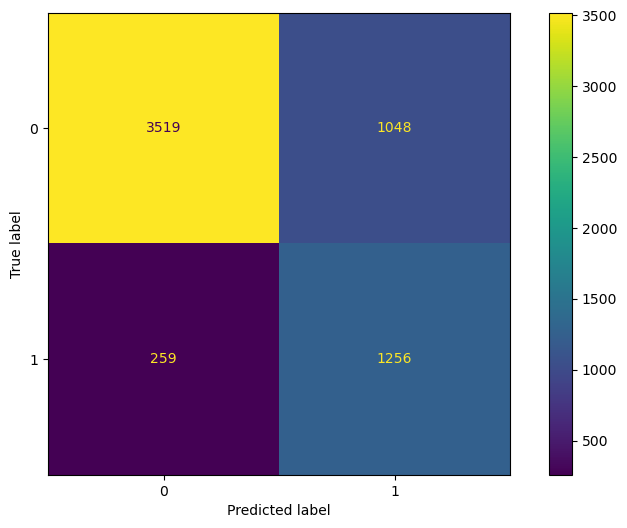

In [121]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test)

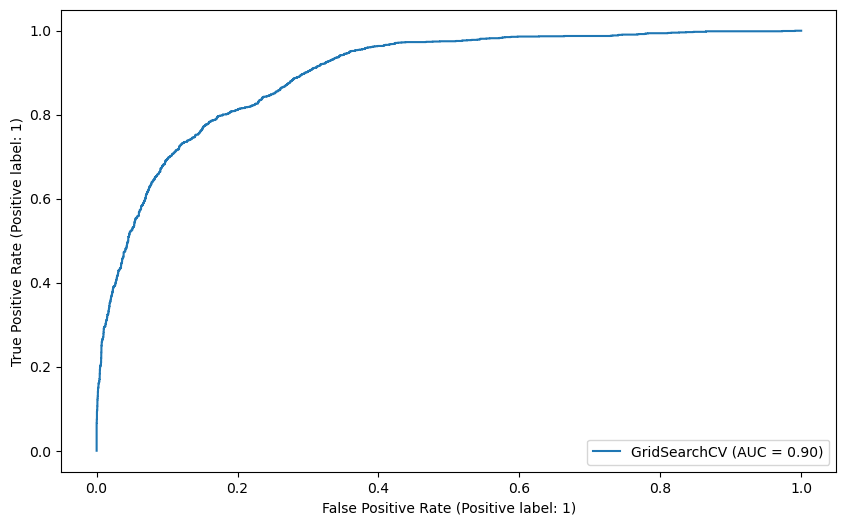

In [122]:
RocCurveDisplay.from_estimator(svm_model_grid, X_test, y_test)

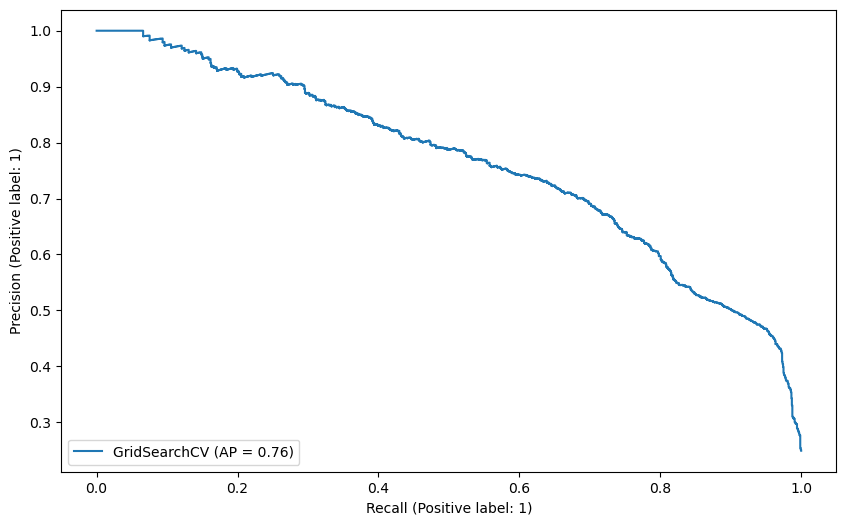

In [123]:
PrecisionRecallDisplay.from_estimator(svm_model_grid, X_test, y_test)